## **//life motto**

**if(sad()==true){**

> **sad().stop();**

> **beAwesome();**

**}**


# **Author: Jainil Sanghavi**
# **Organization: The Sparks Foundation**
# **Domain: Data Science & Business Analytics**
# **Task 6: Precdiction using Decision Tree Algorithm**

## **Importing Required Libraries:**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## **Loading Dataset:**

In [4]:
iris = pd.read_csv("/content/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.shape

(150, 6)

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.drop("Id", axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## **Data Visualization:**

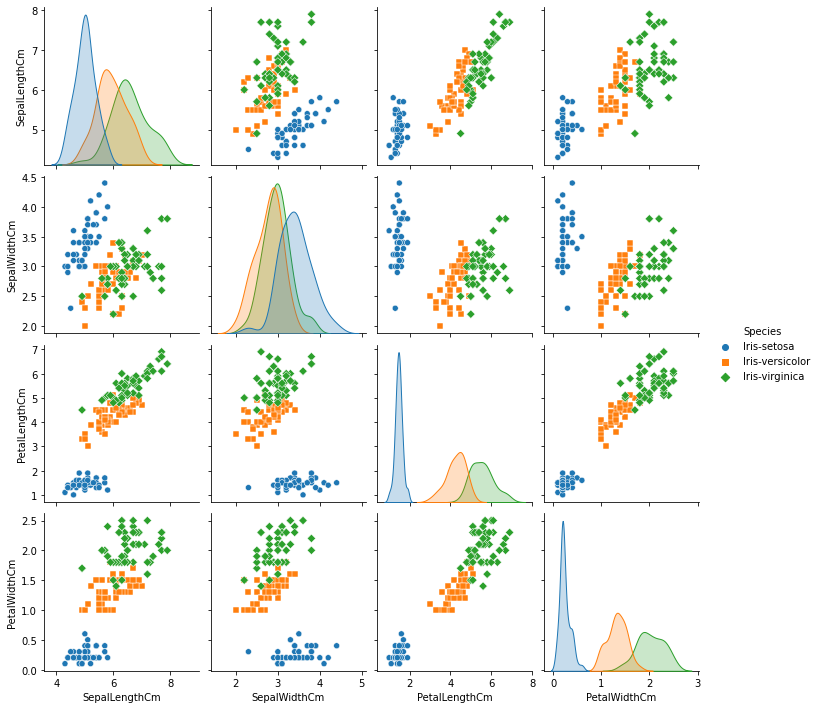

In [17]:
sns.pairplot(data=iris, hue="Species", markers=["o", "s", "D"])
plt.show()

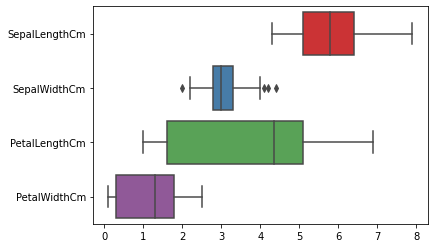

In [18]:
sns.boxplot(data=iris, orient="h", palette="Set1")

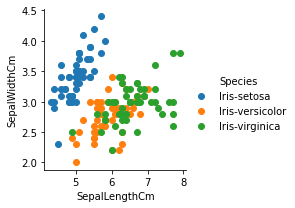

In [19]:
#Scatter plot of data based on Sepal Length & Width Features
sns.FacetGrid(data=iris, hue="Species").map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show() 

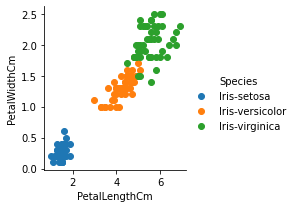

In [20]:
#Scatter plot of data based on Petal Length & Width Features
sns.FacetGrid(data=iris, hue="Species").map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
plt.show()

## **Plotting HeatMap of Correlated Data:**

[]

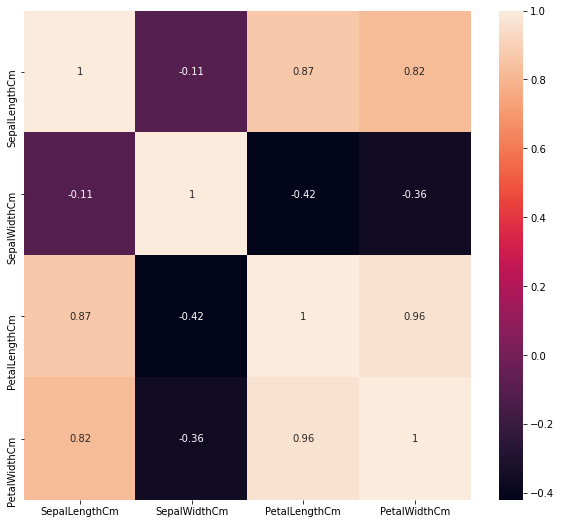

In [22]:
plt.figure(figsize=(10,9))
sns.heatmap(iris.corr(), annot=True)
plt.plot()

## **Preparing the Data:**

In [23]:
x = iris.iloc[:, 1:5].values
y = iris.iloc[:, -1].values

In [24]:
x

array([[3.5, 1.4, 0.2, 'Iris-setosa'],
       [3.0, 1.4, 0.2, 'Iris-setosa'],
       [3.2, 1.3, 0.2, 'Iris-setosa'],
       [3.1, 1.5, 0.2, 'Iris-setosa'],
       [3.6, 1.4, 0.2, 'Iris-setosa'],
       [3.9, 1.7, 0.4, 'Iris-setosa'],
       [3.4, 1.4, 0.3, 'Iris-setosa'],
       [3.4, 1.5, 0.2, 'Iris-setosa'],
       [2.9, 1.4, 0.2, 'Iris-setosa'],
       [3.1, 1.5, 0.1, 'Iris-setosa'],
       [3.7, 1.5, 0.2, 'Iris-setosa'],
       [3.4, 1.6, 0.2, 'Iris-setosa'],
       [3.0, 1.4, 0.1, 'Iris-setosa'],
       [3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.0, 1.2, 0.2, 'Iris-setosa'],
       [4.4, 1.5, 0.4, 'Iris-setosa'],
       [3.9, 1.3, 0.4, 'Iris-setosa'],
       [3.5, 1.4, 0.3, 'Iris-setosa'],
       [3.8, 1.7, 0.3, 'Iris-setosa'],
       [3.8, 1.5, 0.3, 'Iris-setosa'],
       [3.4, 1.7, 0.2, 'Iris-setosa'],
       [3.7, 1.5, 0.4, 'Iris-setosa'],
       [3.6, 1.0, 0.2, 'Iris-setosa'],
       [3.3, 1.7, 0.5, 'Iris-setosa'],
       [3.4, 1.9, 0.2, 'Iris-setosa'],
       [3.0, 1.6, 0.2, 'I

In [25]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## **Train Test Split:**

In [37]:
train, test = train_test_split(iris,test_size=0.2, random_state=42)

In [39]:
train_x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species

In [40]:
test_x = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

## **Building a Decision Tree Classifier**

In [41]:
DT = DecisionTreeClassifier()
model = DT.fit(train_x, train_y)

In [42]:
DT.predict(test_x)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [43]:
DT.score(test_x, test_y)

1.0

In [44]:
#prediction
y_pred = DT.predict(test_x)

In [48]:
#Accuracy
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred)*100)

Accuracy Score: 100.0


In [51]:
iris = pd.DataFrame({"Actual": test_y, "Predicted": y_pred})
iris

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


## **Plotting Confusion Matrix Data:**

In [52]:
confusion_matrix = pd.crosstab(iris['Actual'], iris['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               10                0               0
Iris-versicolor            0                9               0
Iris-virginica             0                0              11


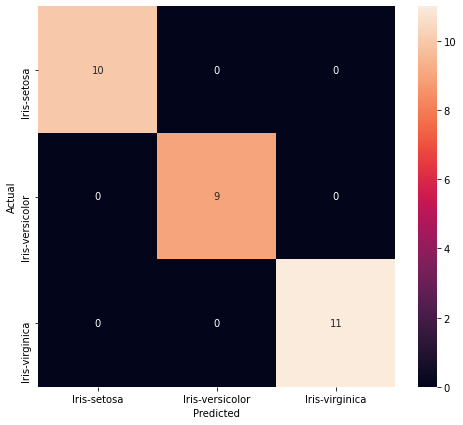

In [65]:
plt.figure(figsize=(8,7))

sns.heatmap(confusion_matrix, annot=True)
plt.show()

## **Decision Tree Algorithm:**

<Figure size 2160x1440 with 0 Axes>

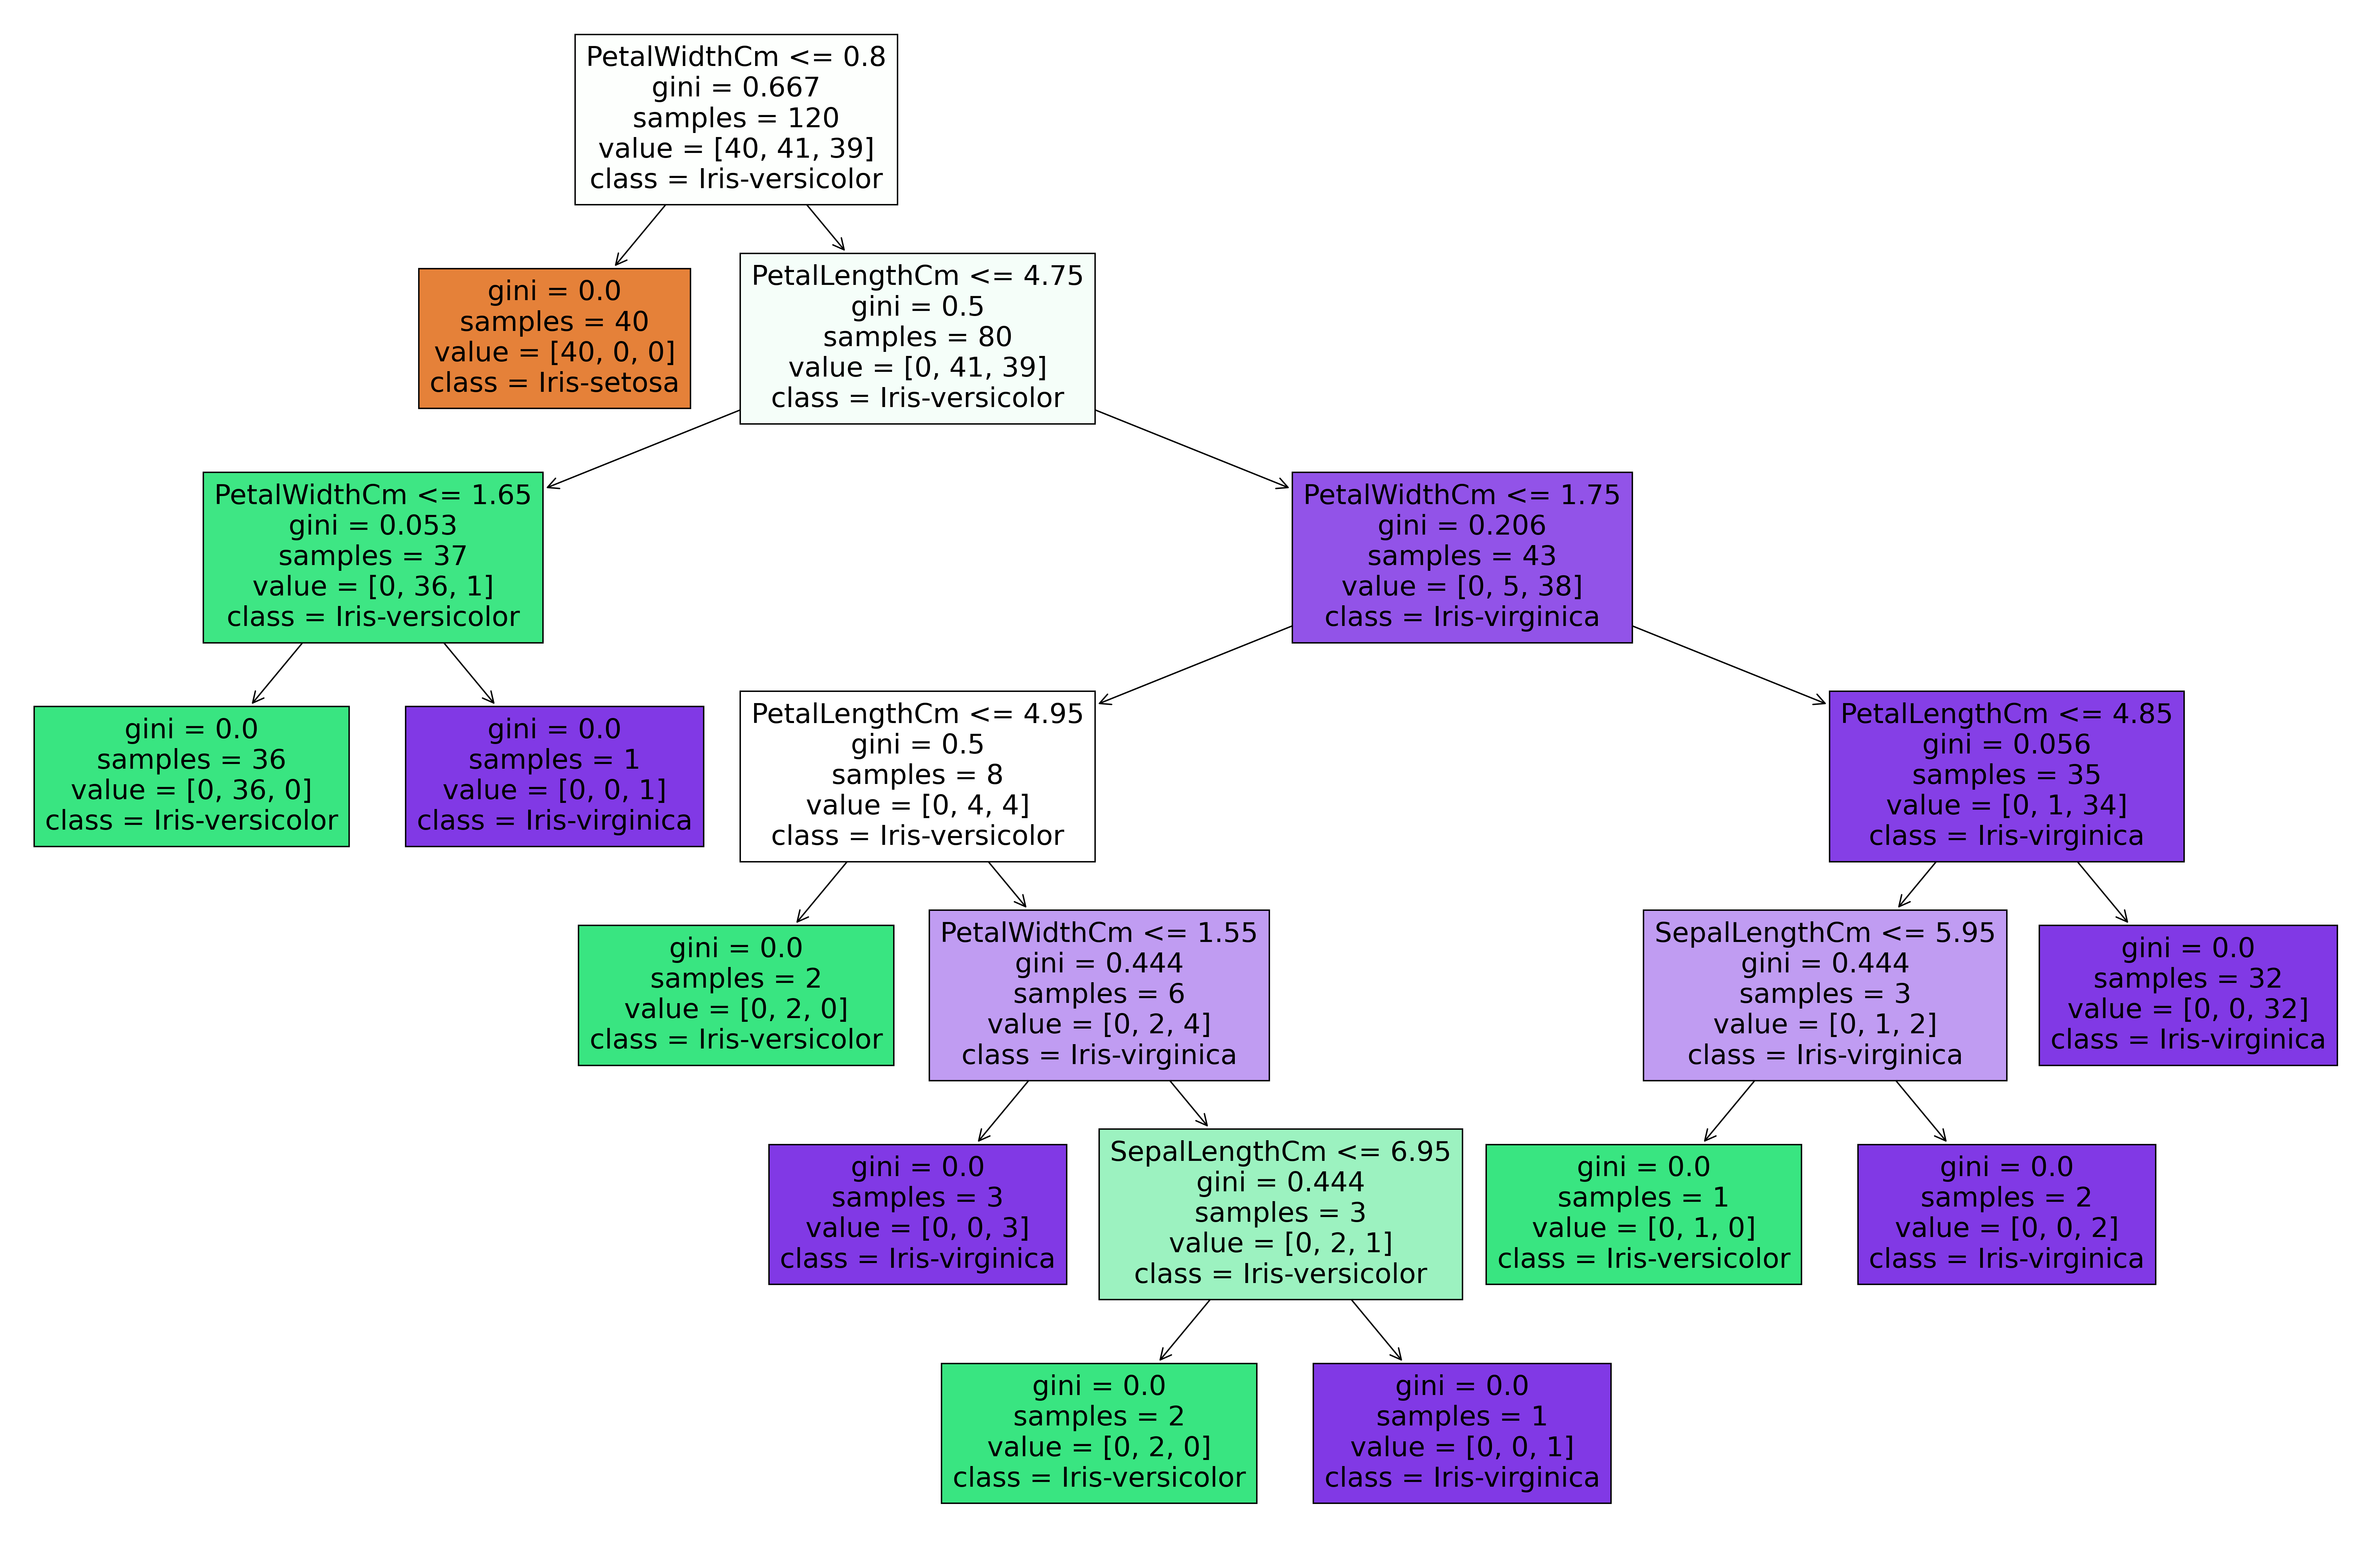

In [67]:
plt.figure(figsize=(30,20))

feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(30,20), dpi=300)
tree_img = plot_tree(DT,feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# **Conclusion:**

### **Hence, The Decision Tree Model has been created and visualized with accuracy of 100% in the test dataset!!**